# ***First dlib application***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from imutils import face_utils
import dlib
import cv2

In [ ]:
p = "/content/drive/MyDrive/CNN/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CNN/rp.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
rects = detector(gray, 0)

In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

In [ ]:
for (x, y) in shape:
		cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# ***Second dlib application***

In [ ]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

In [ ]:
import argparse
import imutils
import time
import dlib
import cv2

In [ ]:
# load dlib's HOG + Linear SVM face detector
print("[INFO] loading HOG + Linear SVM face detector...")
detector = dlib.get_frontal_face_detector()
# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread("/content/drive/MyDrive/CNN/rp.jfif")
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
rects = detector(rgb)
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO] loading HOG + Linear SVM face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.0701 seconds


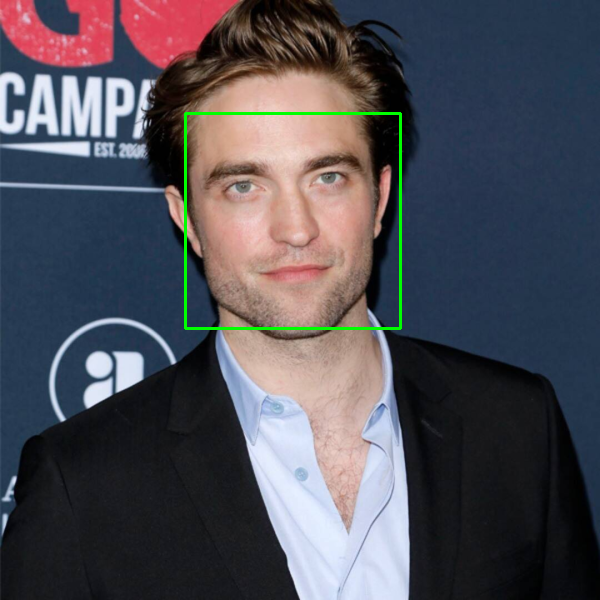

In [ ]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r) for r in rects]
# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
# show the output image
cv2_imshow(image)

# ***Face detector with MTCNN***

In [ ]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 9.4MB/s 


In [ ]:
import cv2
from facenet_pytorch import MTCNN
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
class FaceDetector(object):
  def __init__(self, mtcnn):
    self.mtcnn = mtcnn
  
  def _draw(self, frame, boxes, probs, landmarks):
    for box, prob, ld in zip(boxes, probs, landmarks):
      cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0,0,255), thickness=2)

      cv2.putText(frame, str(prob), (box[2], box[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

      cv2.circle(frame, tuple(ld[0]), 5, (0,0,255), -1)
      cv2.circle(frame, tuple(ld[1]), 5, (0,0,255), -1)
      cv2.circle(frame, tuple(ld[2]), 5, (0,0,255), -1)
      cv2.circle(frame, tuple(ld[3]), 5, (0,0,255), -1)
      cv2.circle(frame, tuple(ld[4]), 5, (0,0,255), -1)
    
    return frame
  
  def run(self):
    count = 0
    count = count + 1
    if count == 20:
      print("halalu bitches")
    
    cap = cv2.VideoCapture(0)
    
    while True:
      ret, frame = cap.read()
      
      try:
        boxes, probs, landmarks = self.mtcnn.detect(frame, landmarks=True)
        self._draw(frame, boxes, probs, landmarks)
      except:
        pass
      
      cv2_imshow(frame)
      
      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
      
      cap.release()
      cv2.destroyAllWindows()

In [ ]:
mtcnn = MTCNN()
fcd = FaceDetector(mtcnn)
fcd.run()

In [ ]:
cap = cv2.VideoCapture('9-MaleNoGlasses.avi')
count = 0
while cap.isOpened():
    count = count + 1
    if count == 20:
      print("halalu bitches")
      break
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    cv2.destroyAllWindows()
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# ***Third***

In [1]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 31.8MB/s 


In [2]:
import cv2
from imutils import face_utils
import dlib
import torch
import argparse
import os
import shutil
import random
import glob
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from shutil import copyfile
import imutils
import numpy as np
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
from scipy.spatial import distance as dist

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
p = "/content/drive/MyDrive/CNN/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [5]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

In [6]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = dist.euclidean(eye[0], eye[3])
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
	# return the eye aspect ratio
	return ear

In [7]:
def mouth_opening_ratio(mounth):
  A = dist.euclidean(mouth[3], mouth[9])
  B = dist.euclidean(mouth[2], mouth[10])
  C = dist.euclidean(mouth[4], mouth[8])
  D = dist.euclidean(mouth[0], mouth[6])

  mor = (A+B+C) / (3.0 * D) 
  return mor

In [8]:
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 3
# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

In [9]:
# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
(mStart, mEnd) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]
mor_values = []

In [ ]:
v_cap = cv2.VideoCapture('/content/drive/MyDrive/CNN/Male_mirror Avi Videos/1-MaleNoGlasses-Yawning.avi')
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(v_len)

frames = []
for _ in range(v_len):
  ret, frame = v_cap.read()
  image = imutils.resize(frame, width=600)
  #rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #rects = detector(rgb)
  #boxes = [convert_and_trim_bb(image, r) for r in rects]
  #for (x, y, w, h) in boxes:
    #image = image[y:y+h,x:x+w]
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  frames.append(image)

441


In [ ]:
v_cap = cv2.VideoCapture('/content/drive/MyDrive/CNN/Male_mirror Avi Videos/1-MaleNoGlasses-Yawning.avi')
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(v_len)

for _ in range(v_len):
  ret, frame = v_cap.read()
  image = imutils.resize(frame, width=600)
  #rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #rects = detector(rgb)
  #boxes = [convert_and_trim_bb(image, r) for r in rects]
  #for (x, y, w, h) in boxes:
    #image = image[y:y+h,x:x+w]
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  frames.append(image)

In [ ]:
files_name = []
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    filename = os.path.join(subdir, file)
    files_name.append(filename)

In [13]:
DIR = '/content/drive/MyDrive/CNN/Male_mirror Avi Videos/'
lenght = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
lenght

164

In [11]:
if os.path.isdir('yawning') is False:
    os.makedirs('yawning')
    os.makedirs('talking')
    os.makedirs('normal')

In [ ]:
mor_values

In [14]:
frames = []
count = 0
count2 = 0
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    filename = os.path.join(subdir, file)
    count = count + 1
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(v_len)
    print(count)
    for _ in range(v_len):
      count2 = count2 + 1
      ret, frame = v_cap.read()
      image = imutils.resize(frame, width=600)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #rects = detector(rgb)
      #boxes = [convert_and_trim_bb(image, r) for r in rects]
      #for (x, y, w, h) in boxes:
      #image = image[y:y+h,x:x+w]
      #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      rects = detector(gray, 0)
      for (j, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        mouth = shape[mStart:mEnd]
        mor = mouth_opening_ratio(mouth)
        mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
        if mor > 0.59:
          os.chdir('yawning')
          cv2.imwrite('yawning' + str(count) + '_mm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
        elif mor < 0.28:
          os.chdir('normal')
          cv2.imwrite('normal' + str(count) + '_mm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
        else:
          os.chdir('talking')
          cv2.imwrite('talking' + str(count) + '_mm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')

441
1
442
2
726
3
451
4
429
5
552
6
766
7
523
8
369
9
1015
10
596
11
395
12
407
13
430
14
444
15
462
16
548
17
470
18
298
19
552
20
521
21
507
22
397
23
682
24
611
25
458
26
737
27
559
28
737
29
434
30
644
31
1124
32
828
33
554
34
213
35
1124
36
753
37
980
38
552
39
639
40
921
41
263
42
561
43
763
44
576
45
532
46
570
47
571
48
956
49
525
50
708
51
481
52
1029
53
808
54
592
55
1207
56
832
57
585
58
806
59
1304
60
461
61
1023
62
682
63
973
64
1465
65
703
66
734
67
620
68
761
69
775
70
794
71
774
72
804
73
509
74
530
75
1248
76
464
77
1127
78
866
79
544
80
549
81
1057
82
527
83
500
84
684
85
512
86
530
87
514
88
655
89
655
90
540
91
794
92
483
93
842
94
712
95
559
96
899
97
616
98
624
99
536
100
636
101
982
102
499
103
886
104
733
105
636
106
516
107
633
108
504
109
736
110
590
111
689
112
875
113
474
114
670
115
520
116
516
117
875
118
1224
119
429
120
608
121
740
122
446
123
540
124
973
125
459
126
618
127
460
128
1108
129
759
130
567
131
447
132
877
133
797
134
726
135
800
136
657
137

In [42]:
DIRa = '/content/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/talking'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

0
0
0


In [ ]:
for c in random.sample(glob.glob('/content/yawning/*.jpg'), 3392):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd/yawning')

In [39]:
for c in random.sample(glob.glob('/content/talking/*.jpg'), 751):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd/talking')

In [22]:
for c in random.sample(glob.glob('/content/normal/*.jpg'), 16653):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd/normal')

In [64]:
DIRa = '/content/drive/MyDrive/CNN/yawdd/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/drive/MyDrive/CNN/yawdd_2/others'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/drive/MyDrive/CNN/yawdd_2/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

16653
2901
2901


In [ ]:
DIR = '/content/drive/MyDrive/CNN/Female_mirror/'
lenght = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
lenght

In [ ]:
frames = []
count = 0
count2 = 0
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    filename = os.path.join(subdir, file)
    count = count + 1
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(v_len)
    print(count)
    for _ in range(v_len):
      count2 = count2 + 1
      ret, frame = v_cap.read()
      image = imutils.resize(frame, width=600)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #rects = detector(rgb)
      #boxes = [convert_and_trim_bb(image, r) for r in rects]
      #for (x, y, w, h) in boxes:
      #image = image[y:y+h,x:x+w]
      #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      rects = detector(gray, 0)
      for (j, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        mouth = shape[mStart:mEnd]
        mor = mouth_opening_ratio(mouth)
        mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
        if mor > 0.6:
          os.chdir('yawning')
          cv2.imwrite('yawning' + str(count) + '_fm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
        elif mor < 0.28:
          os.chdir('normal')
          cv2.imwrite('normal' + str(count) + '_fm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
        else:
          os.chdir('talking')
          cv2.imwrite('talking' + str(count) + '_fm_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
      #frames.append(image)

In [ ]:
DIRa = '/content/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/talking'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

In [ ]:
for c in random.sample(glob.glob('/content/yawning/*.jpg'), 4630):
    shutil.move(c, '/content/drive/MyDrive/CNN/dataset/yawning')

In [ ]:
for c in random.sample(glob.glob('/content/talking/*.jpg'), 4630):
    shutil.move(c, '/content/drive/MyDrive/CNN/dataset/talking')

In [ ]:
for c in random.sample(glob.glob('/content/normal/*.jpg'), 4630):
    shutil.move(c, '/content/drive/MyDrive/CNN/dataset/normal')

In [43]:
DIR = '/content/drive/MyDrive/CNN/Male/'
lenght = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
lenght

16

In [44]:
frames = []
count = 0
count2 = 0
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    filename = os.path.join(subdir, file)
    count = count + 1
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(v_len)
    print(count)
    if count != 4:
      for _ in range(v_len):
        count2 = count2 + 1
        ret, frame = v_cap.read()
        image = imutils.resize(frame, width=600)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)
        for (j, rect) in enumerate(rects):
          shape = predictor(gray, rect)
          shape = face_utils.shape_to_np(shape)
          mouth = shape[mStart:mEnd]
          mor = mouth_opening_ratio(mouth)
          mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
          if mor > 0.58:
             os.chdir('yawning')
             cv2.imwrite('yawning' + str(count) + '_m_' + str(count2) + '.jpg',mouth_image)
             os.chdir('..')
          else:
            os.chdir('talking')
            cv2.imwrite('talking' + str(count) + '_m_' + str(count2) + '.jpg',mouth_image)
            os.chdir('..')

2576
1
2020
2
2086
3
2179
4
2395
5
2398
6
1633
7
1998
8
2364
9
2418
10
1760
11
1957
12
2190
13
3010
14
2639
15
2503
16


error: ignored

In [52]:
DIRa = '/content/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/talking'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

0
0
0


In [48]:
for c in random.sample(glob.glob('/content/yawning/*.jpg'), 2901):
  shutil.move(c, '/content/drive/MyDrive/CNN/yawdd_2/yawning')

In [49]:
for c in random.sample(glob.glob('/content/talking/*.jpg'), 2901):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd_2/others')

In [51]:
for c in random.sample(glob.glob('/content/talking/*.jpg'), 25013):
    os.remove(c)

In [54]:
DIR = '/content/drive/MyDrive/CNN/Female/'
lenght = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
lenght

13

In [57]:
frames = []
count = 0
count2 = 0
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    filename = os.path.join(subdir, file)
    count = count + 1
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(v_len)
    print(count)
    for _ in range(v_len):
      count2 = count2 + 1
      ret, frame = v_cap.read()
      image = imutils.resize(frame, width=600)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      rects = detector(gray, 0)
      for (j, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        mouth = shape[mStart:mEnd]
        mor = mouth_opening_ratio(mouth)
        mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
        if mor > 0.58:
          os.chdir('yawning')
          cv2.imwrite('yawning' + str(count) + '_f_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')
        else:
          os.chdir('talking')
          cv2.imwrite('talking' + str(count) + '_f_' + str(count2) + '.jpg',mouth_image)
          os.chdir('..')

2741
1
2180
2
3057
3
1496
4
2297
5
2149
6
1683
7
1491
8
3618
9
1532
10
2488
11
2518
12
1217
13


In [61]:
DIRa = '/content/yawning'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/talking'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)
DIRa = '/content/normal'
lenght = len([name for name in os.listdir(DIRa) if os.path.isfile(os.path.join(DIRa, name))])
print(lenght)

0
19366
0


In [59]:
for c in random.sample(glob.glob('/content/yawning/*.jpg'), 4314):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd/yawning')

In [60]:
for c in random.sample(glob.glob('/content/talking/*.jpg'), 4314):
    shutil.move(c, '/content/drive/MyDrive/CNN/yawdd/talking')

In [ ]:
for c in random.sample(glob.glob('/content/normal/*.jpg'), 851):
    shutil.move(c, '/content/drive/MyDrive/CNN/dataset/normal')

In [ ]:
frames = []
count = 0
count2 = 0
for subdir, dirs, files in os.walk(DIR):
  for file in files:
    count2 = count2 + 1
    print('new file')
    print(count2)
    filename = os.path.join(subdir, file)
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    count = count + v_len
    print('count value')
    print(count)
    print('mor_array size')
    print(len(mor_values))
    for _ in range(v_len):
      ret, frame = v_cap.read()
      image = imutils.resize(frame, width=600)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #rects = detector(rgb)
      #boxes = [convert_and_trim_bb(image, r) for r in rects]
      #for (x, y, w, h) in boxes:
      #image = image[y:y+h,x:x+w]
      #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      rects = detector(gray, 0)
      for (j, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        mouth = shape[mStart:mEnd]
        mor = mouth_opening_ratio(mouth)
        mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
        mor_values.append(mor)

In [ ]:
dataset = []
ear_values = []
mor_values = []
for i in range(len(frames)):
  image = frames[i]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)
  for (j, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)
    mouth = shape[mStart:mEnd]
    mor = mouth_opening_ratio(mouth)
    ear = (leftEAR + rightEAR) / 2.0
    mouth_image = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
    frames[i] = mouth_image
    ear_values.append(ear)
    mor_values.append(mor)

In [ ]:
print(os.getcwd())
os.chdir('yawning')
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

/content
/content/yawning
/content


In [ ]:
os.chdir('..')

In [ ]:
os.getcwd()

'/content'

In [ ]:
cv2.imwrite('kang.jpg',dataset[0])

True

In [ ]:
for i in range(len(mor_values)):
  print(i, '-- ',mor_values[i])

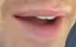

In [ ]:
cv2_imshow(dataset[217])

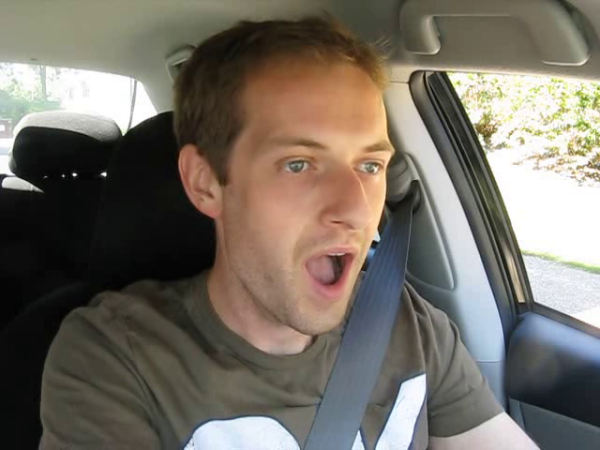

In [ ]:
image = frames[174]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

In [ ]:
rects = detector(gray, 0)

In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  leftEye = shape[lStart:lEnd]
  rightEye = shape[rStart:rEnd]
  leftEAR = eye_aspect_ratio(leftEye)
  rightEAR = eye_aspect_ratio(rightEye)
  mouth = shape[mStart:mEnd]
  mor = mouth_opening_ratio(mouth)
  ear = (leftEAR + rightEAR) / 2.0

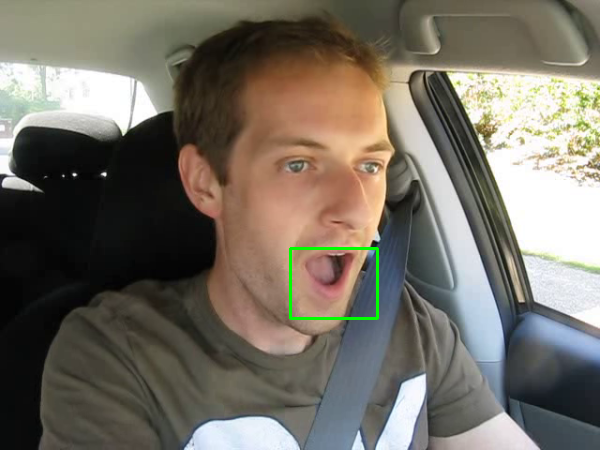

In [ ]:
#cv2.rectangle(image, (mouth[0][0]-10, mouth[2][1]-10), (mouth[6][0]+10, mouth[9][1]+10), (0, 255, 0), 2)
#cv2_imshow(image)
new = image[mouth[2][1]-10:mouth[9][1]+10,mouth[0][0]-10:mouth[6][0]+10]
cv2_imshow(new)

In [ ]:
print(mor)
print(ear)

0.6833399365268423

In [ ]:
print(lStart)
print(lEnd)
print(rStart)
print(rEnd)
print(mStart)
print(mEnd)

42
48
36
42
48
68


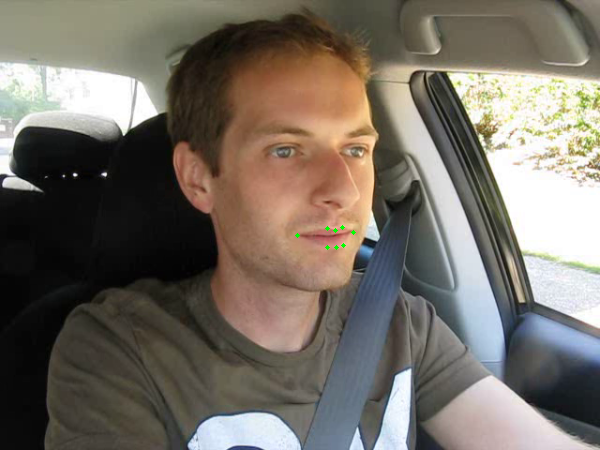

In [ ]:
cv2.circle(image, (mouth[4][0], mouth[4][1]), 2, (0, 255, 0), -1)
cv2.circle(image, (mouth[8][0], mouth[8][1]), 2, (0, 255, 0), -1)
cv2_imshow(image)

In [ ]:
leftEyeHull = cv2.convexHull(leftEye)
rightEyeHull = cv2.convexHull(rightEye)
cv2.drawContours(image, [leftEyeHull], -1, (0, 255, 0), 1)
cv2.drawContours(image, [rightEyeHull], -1, (0, 255, 0), 1)

array([[[121, 140, 139],
        [121, 140, 139],
        [121, 140, 139],
        ...,
        [119, 127, 136],
        [119, 127, 136],
        [119, 127, 136]],

       [[121, 140, 139],
        [121, 140, 139],
        [121, 140, 139],
        ...,
        [119, 127, 136],
        [119, 127, 136],
        [119, 127, 136]],

       [[121, 140, 139],
        [121, 140, 139],
        [121, 140, 139],
        ...,
        [118, 126, 135],
        [118, 126, 135],
        [118, 126, 135]],

       ...,

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 81,  73,  63],
        [ 81,  73,  63],
        [ 81,  73,  63]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 79,  71,  61],
        [ 79,  71,  61],
        [ 79,  71,  61]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 79,  71,  61],
        [ 79,  71,  61],
        [ 79,  71,  61]]

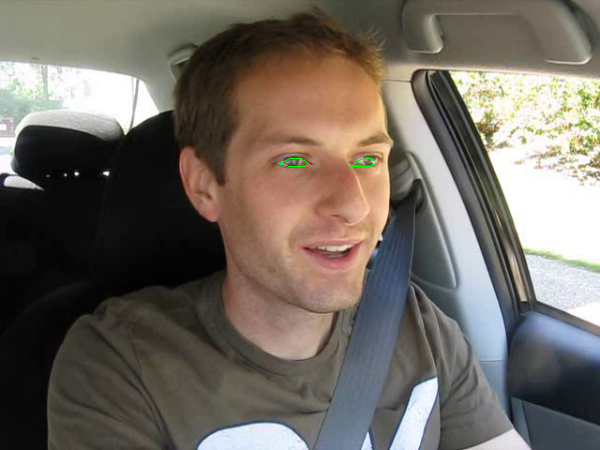

In [ ]:
cv2_imshow(image)

In [ ]:
for (x, y) in shape:
		cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

In [ ]:
cv2_imshow(image)

In [ ]:
boxes = [convert_and_trim_bb(image, r) for r in rects]
for (x, y, w, h) in boxes:
  image = image[y:y+h,x:x+w]

In [ ]:
print(lStart)
print(lEnd)
print(rStart)
print(rEnd)

42
48
36
42


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from shutil import copyfile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-8]:
  model.add(layer)

In [ ]:
model.summary()

In [ ]:
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
if os.path.isdir('train/talking') is False:
    os.makedirs('train/talking')
    os.makedirs('validation/talking')
    os.makedirs('test/talking')
    os.makedirs('train/normal')
    os.makedirs('validation/normal')
    os.makedirs('test/normal')
    os.makedirs('train/yawning')
    os.makedirs('validation/yawning')
    os.makedirs('test/yawning')

In [ ]:
for c in random.sample(glob.glob('yawning/*.jpg'), ):
    shutil.move(c, 'train/yawning')
for c in random.sample(glob.glob('yawning/*.jpg'), ):
    shutil.move(c, 'test/yawning')
for c in random.sample(glob.glob('yawning/*.jpg'), ):
    shutil.move(c, 'validation/yawning')
for c in random.sample(glob.glob('normal/*.jpg'), ):
    shutil.move(c, 'train/normal')
for c in random.sample(glob.glob('normal/*.jpg'), ):
    shutil.move(c, 'test/normal')
for c in random.sample(glob.glob('normal/*.jpg'), ):
    shutil.move(c, 'validation/normal')
for c in random.sample(glob.glob('talking/*.jpg'), ):
    shutil.move(c, 'train/talking')
for c in random.sample(glob.glob('talking/*.jpg'), ):
    shutil.move(c, 'test/talking')
for c in random.sample(glob.glob('talking/*.jpg'), ):
    shutil.move(c, 'validation/talking')

TypeError: ignored

In [ ]:
train_path = 'train'
validation_path = 'validation'
test_path = 'test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['yawning', 'normal', 'talking'], batch_size=10)
validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validation_path, target_size=(224,224), classes=['yawning', 'normal', 'talking'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['yawning', 'normal', 'talking'], batch_size=10, shuffle=False)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=validation_batches, epochs=10, verbose=1)

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    
    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, cm[i, j],
                horizontalalignment="center",
                color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.classes

In [ ]:
cm_plot_labels = ['closed', 'open']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
INIT_LR = 1e-4
EPOCHS = 10
BS = 32

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
baseModel.summary()

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
print("[INFO] training head...")
H = model.fit(
    aug.flow(train_batches, batch_size=BS),
    steps_per_epoch=len(train_batches) // BS,
    validation_data=validation_batches,
    validation_steps=len(validation_batches) // BS,
    epochs=EPOCHS)